https://www.kaggle.com/shivanirana63/fake-job-prediction-ensemble-modeling

We will apply 3 different classification algorithms to gain maximum possible accuracy score which are:

1) Logistic Regression
2) K Nearest Neighbours
3) Random Forest
For training these models,

Independent variable : X
Dependent variable : Y (Check if posted job is fake or not)

In [3]:
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt

In [4]:
df = pd.read_csv("fake_job_postings.csv")
df.head()

,job_id,title,location,department,salary_range,company_profile,description,requirements,benefits,telecommuting,has_company_logo,has_questions,employment_type,required_experience,required_education,industry,function,fraudulent
0,1,Marketing Intern,"US, NY, New York",Marketing,NaN,"We're Food52, and we've created a groundbreaki...","Food52, a fast-growing, James Beard Award-winn...",Experience with content management systems a m...,NaN,0,1,0,Other,Internship,NaN,NaN,Marketing,0
1,2,Customer Service - Cloud Video Production,"NZ, , Auckland",Success,NaN,"90 Seconds, the worlds Cloud Video Production ...",Organised - Focused - Vibrant - Awesome!Do you...,What we expect from you:Your key responsibilit...,What you will get from usThrough being part of...,0,1,0,Full-time,Not Applicable,NaN,Marketing and Advertising,Customer Service,0
2,3,Commissioning Machinery Assistant (CMA),"US, IA, Wever",NaN,NaN,Valor Services provides Workforce Solutions th...,"Our client, located in Houston, is actively se...",Implement pre-commissioning and commissioning ...,NaN,0,1,0,NaN,NaN,NaN,NaN,NaN,0
3,4,Account Executive - Washington DC,"US, DC, Washington",Sales,NaN,Our passion for improving quality of life thro...,THE COMPANY: ESRI – Environmental Systems Rese...,"EDUCATION: Bachelor’s or Master’s in GIS, busi...",Our culture is anything but corporate—we have ...,0,1,0,Full-time,Mid-Senior level,Bachelor's Degree,Computer Software,Sales,0
4,5,Bill Review Manager,"US, FL, Fort Worth",NaN,NaN,SpotSource Solutions LLC is a Global Human Cap...,JOB TITLE: Itemization Review ManagerLOCATION:...,QUALIFICATIONS:RN license in the State of Texa...,Full Benefits Offered,0,1,1,Full-time,Mid-Senior level,Bachelor's Degree,Hospital & Health Care,Health Care Provider,0


In [5]:
df.columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17880 entries, 0 to 17879
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   job_id               17880 non-null  int64 
 1   title                17880 non-null  object
 2   location             17534 non-null  object
 3   department           6333 non-null   object
 4   salary_range         2868 non-null   object
 5   company_profile      14572 non-null  object
 6   description          17879 non-null  object
 7   requirements         15185 non-null  object
 8   benefits             10670 non-null  object
 9   telecommuting        17880 non-null  int64 
 10  has_company_logo     17880 non-null  int64 
 11  has_questions        17880 non-null  int64 
 12  employment_type      14409 non-null  object
 13  required_experience  10830 non-null  object
 14  required_education   9775 non-null   object
 15  industry             12977 non-null  object
 16  func

In [6]:
df.describe()

,job_id,telecommuting,has_company_logo,has_questions,fraudulent
count,17880.000000,17880.000000,17880.000000,17880.000000,17880.000000
mean,8940.500000,0.042897,0.795302,0.491723,0.048434
std,5161.655742,0.202631,0.403492,0.499945,0.214688
min,1.000000,0.000000,0.000000,0.000000,0.000000
25%,4470.750000,0.000000,1.000000,0.000000,0.000000
50%,8940.500000,0.000000,1.000000,0.000000,0.000000
75%,13410.250000,0.000000,1.000000,1.000000,0.000000
max,17880.000000,1.000000,1.000000,1.000000,1.000000


In [7]:
df.shape

(17880, 18)

In [8]:
df.columns

Index(['job_id', 'title', 'location', 'department', 'salary_range',
       'company_profile', 'description', 'requirements', 'benefits',
       'telecommuting', 'has_company_logo', 'has_questions', 'employment_type',
       'required_experience', 'required_education', 'industry', 'function',
       'fraudulent'],
      dtype='object')

In [9]:
df.isna().apply(pd.value_counts)
df.isnull().sum()

job_id                     0
title                      0
location                 346
department             11547
salary_range           15012
company_profile         3308
description                1
requirements            2695
benefits                7210
telecommuting              0
has_company_logo           0
has_questions              0
employment_type         3471
required_experience     7050
required_education      8105
industry                4903
function                6455
fraudulent                 0
dtype: int64

In [10]:
# Check if there is any null value
df.isna().apply(pd.value_counts)

,job_id,title,location,department,salary_range,company_profile,description,requirements,benefits,telecommuting,has_company_logo,has_questions,employment_type,required_experience,required_education,industry,function,fraudulent
False,17880.0,17880.0,17534,6333,2868,14572,17879,15185,10670,17880.0,17880.0,17880.0,14409,10830,9775,12977,11425,17880.0
True,NaN,NaN,346,11547,15012,3308,1,2695,7210,NaN,NaN,NaN,3471,7050,8105,4903,6455,NaN


In [11]:
#Check for number of null values
df.isnull().sum()

job_id                     0
title                      0
location                 346
department             11547
salary_range           15012
company_profile         3308
description                1
requirements            2695
benefits                7210
telecommuting              0
has_company_logo           0
has_questions              0
employment_type         3471
required_experience     7050
required_education      8105
industry                4903
function                6455
fraudulent                 0
dtype: int64

In [12]:
#Check if any duplicate rows in dataset
df.duplicated().sum()

0

In [13]:
#drop the duplicate values
df.drop_duplicates(inplace=True)

In [14]:
df.duplicated().sum()


0

In [15]:
#Differentiate categorical data and numerical data
df_num = df[['telecommuting','has_company_logo','has_questions','fraudulent']]
df_cat = df[['title', 'location','company_profile', 'requirements','employment_type',
       'required_experience', 'required_education', 'industry', 'function']]

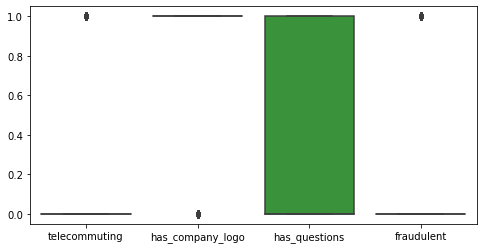

In [16]:
# Checking for Outliers in numerical data
plt.figure(figsize=[8,4])
sb.boxplot(data = df_num)
plt.show()

In [17]:
#Columns 'telecommuting', 'has_company_logo' ,'fradulent' has minimal outliers.
#Removing Outliers from columns
df_num = df_num[df_num['telecommuting'] < 0.9 ]
df_num = df_num[df_num['fraudulent'] < 0.9 ]
df_num = df_num[df_num['has_company_logo'] > 0.1 ]
df_num

,telecommuting,has_company_logo,has_questions,fraudulent
0,0,1,0,0
1,0,1,0,0
2,0,1,0,0
3,0,1,0,0
4,0,1,1,0
...,...,...,...,...
17872,0,1,0,0
17873,0,1,0,0
17875,0,1,1,0
17876,0,1,1,0


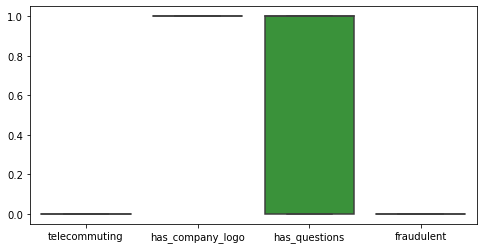

In [18]:
# Checking for Outliers in numerical data
plt.figure(figsize=[8,4])
sb.boxplot(data = df_num)
plt.show()

In [19]:
df.isnull().sum()

job_id                     0
title                      0
location                 346
department             11547
salary_range           15012
company_profile         3308
description                1
requirements            2695
benefits                7210
telecommuting              0
has_company_logo           0
has_questions              0
employment_type         3471
required_experience     7050
required_education      8105
industry                4903
function                6455
fraudulent                 0
dtype: int64

In [20]:
df.dropna(axis= 0, how= 'any', inplace=True)

df['location']=df['location'].fillna('NA')
df['company_profile']=df['company_profile'].fillna('NA')
df['requirements']=df['requirements'].fillna('NA')
df['employment_type']=df['employment_type'].fillna('NA')
df['required_experience']=df['required_experience'].fillna('NA')
df['required_education']=df['required_education'].fillna('NA')
df['industry']=df['industry'].fillna('NA')
df['function']=df['function'].fillna('NA')
df['required_experience']=df['required_experience'].fillna('NA')

In [21]:
df

,job_id,title,location,department,salary_range,company_profile,description,requirements,benefits,telecommuting,has_company_logo,has_questions,employment_type,required_experience,required_education,industry,function,fraudulent
6,7,Head of Content (m/f),"DE, BE, Berlin",ANDROIDPIT,20000-28000,"Founded in 2009, the Fonpit AG rose with its i...",Your Responsibilities: Manage the English-spea...,Your Know-How: ...,Your Benefits: Being part of a fast-growing co...,0,1,1,Full-time,Mid-Senior level,Master's Degree,Online Media,Management,0
15,16,VP of Sales - Vault Dragon,"SG, 01, Singapore",Sales,120000-150000,Jungle Ventures is the leading Singapore based...,About Vault Dragon Vault Dragon is Dropbox for...,Key Superpowers3-5 years of high-pressure sale...,"Basic: SGD 120,000Equity negotiable for a rock...",0,1,1,Full-time,Executive,Bachelor's Degree,Facilities Services,Sales,0
23,24,"Vice President, Sales and Sponsorship (Busines...","US, CA, Carlsbad",Businessfriend.com,100000-120000,"WDM Group is an innovative, forward thinking d...",#URL_eda2500ddcedb60957fcd7f5b164e092966f8c4e8...,"Job Requirements:A reputation as a ""go-getter""...",Businessfriend will offer a competitive six fi...,0,1,0,Full-time,Executive,Unspecified,Internet,Sales,0
98,99,IC&E Technician,"US, , Stocton, CA",Oil & Energy,95000-115000,...,"IC&amp;E Technician | Bakersfield, CA Mt. Poso...","QualificationsKnowledge, Skills &amp; Abilitie...",BENEFITSWhat is offered:Competitive compensati...,0,1,1,Full-time,Mid-Senior level,High School or equivalent,Oil & Energy,Other,1
102,103,Marketing Administrator,"GB, WAR, Coventry",Marketplace,15000-18000,Renewable Energy and Environmental Protection ...,The job is to support the growth of the #URL_9...,"Computer literateAble to work with HTML, altho...",For a suitably motivated and success orientate...,1,1,0,Full-time,Entry level,Bachelor's Degree,Internet,Marketing,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17734,17735,Customer Service Representative,"US, TX, Houston",Customer Service,30000-50000,Gary Cartwright established Cartwright Propert...,We are Seeking a candidate whose core values i...,Home Computer with Internet AccessBasic Comput...,"Weekly pay, PTO, Paid Holidays, 401 k",1,1,0,Full-time,Entry level,High School or equivalent,Real Estate,Customer Service,1
17759,17760,Customer Service Representative,"US, NY, New York",Customer Service,30000-50000,Gary Cartwright established Cartwright Propert...,We are Seeking a candidate whose core values i...,Home Computer with Internet AccessBasic Comput...,"Weekly pay, PTO, Paid Holidays, 401 k",1,1,0,Full-time,Entry level,High School or equivalent,Real Estate,Customer Service,1
17813,17814,Customer Service Representative,"US, PA, Philadelphia",Customer Service,30000-50000,Gary Cartwright established Cartwright Propert...,We are Seeking a candidate whose core values i...,Home Computer with Internet AccessBasic Comput...,"Weekly pay, PTO, Paid Holidays, 401 k",1,1,0,Full-time,Entry level,High School or equivalent,Real Estate,Customer Service,1
17849,17850,Communication Designer,"US, CA, San Francisco",Design,80000-100000,Balanced Labs exists to provide accountants an...,Balanced Labs exists to improve the lives of a...,"Specifically, we’re looking for:5+ years of vi...","We offer great salaries, share options, and a ...",0,1,0,Full-time,Mid-Senior level,Bachelor's Degree,Computer Software,Design,0


In [22]:
df.isnull().sum()

job_id                 0
title                  0
location               0
department             0
salary_range           0
company_profile        0
description            0
requirements           0
benefits               0
telecommuting          0
has_company_logo       0
has_questions          0
employment_type        0
required_experience    0
required_education     0
industry               0
function               0
fraudulent             0
dtype: int64

In [23]:
df.shape

(774, 18)

In [24]:
df.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 774 entries, 6 to 17865
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   job_id               774 non-null    int64 
 1   title                774 non-null    object
 2   location             774 non-null    object
 3   department           774 non-null    object
 4   salary_range         774 non-null    object
 5   company_profile      774 non-null    object
 6   description          774 non-null    object
 7   requirements         774 non-null    object
 8   benefits             774 non-null    object
 9   telecommuting        774 non-null    int64 
 10  has_company_logo     774 non-null    int64 
 11  has_questions        774 non-null    int64 
 12  employment_type      774 non-null    object
 13  required_experience  774 non-null    object
 14  required_education   774 non-null    object
 15  industry             774 non-null    object
 16  functi

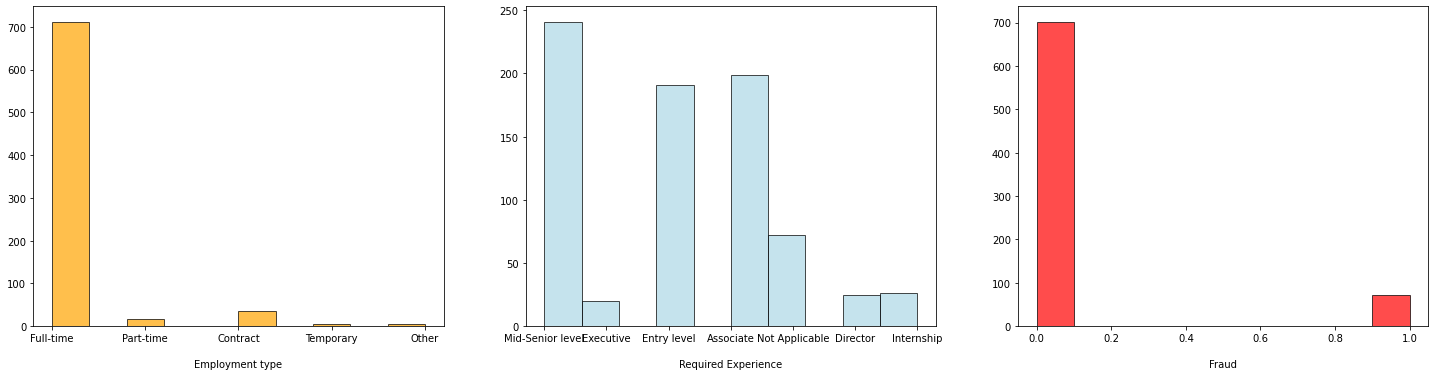

In [25]:
# Plots to see the distribution of the continuous features individually

plt.figure(figsize= (25,20))
plt.subplot(3,3,1)
plt.hist(df.employment_type, color='orange', edgecolor = 'black', alpha = 0.7)
plt.xlabel('\nEmployment type')

plt.subplot(3,3,2)
plt.hist(df.required_experience, color='lightblue', edgecolor = 'black', alpha = 0.7)
plt.xlabel('\nRequired Experience')

plt.subplot(3,3,3)
plt.hist(df.fraudulent, color='red', edgecolor = 'black', alpha = 0.7)
plt.xlabel('\nFraud')


plt.show()

<AxesSubplot:xlabel='function', ylabel='count'>

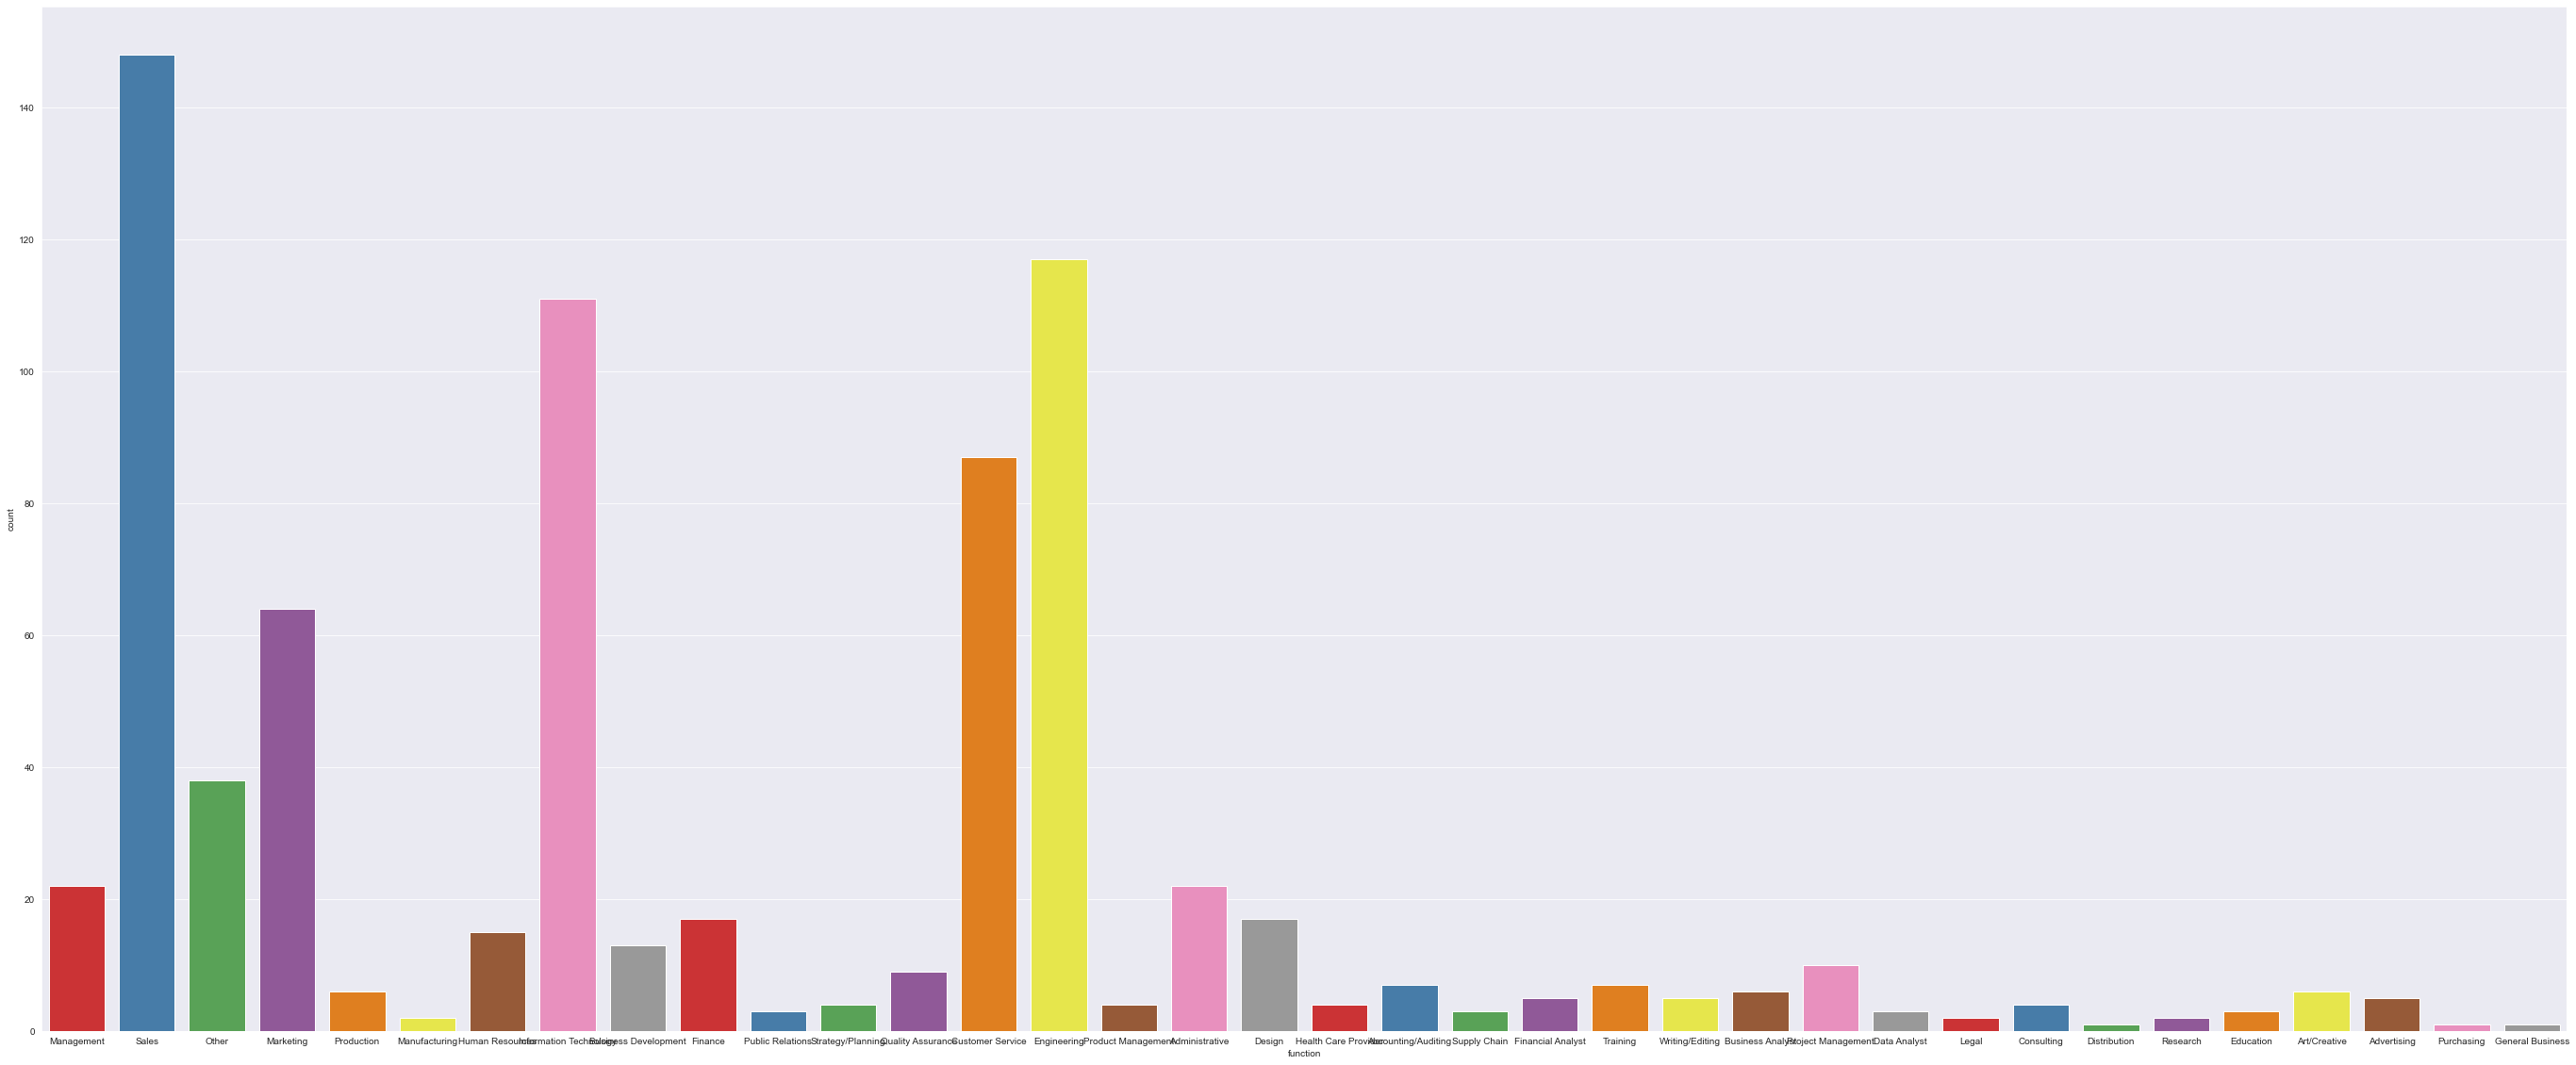

In [26]:
plt.figure(figsize=(48,20))
sb.set_style("darkgrid")
sb.countplot(x='function',data=df,palette='Set1')

<AxesSubplot:xlabel='function', ylabel='count'>

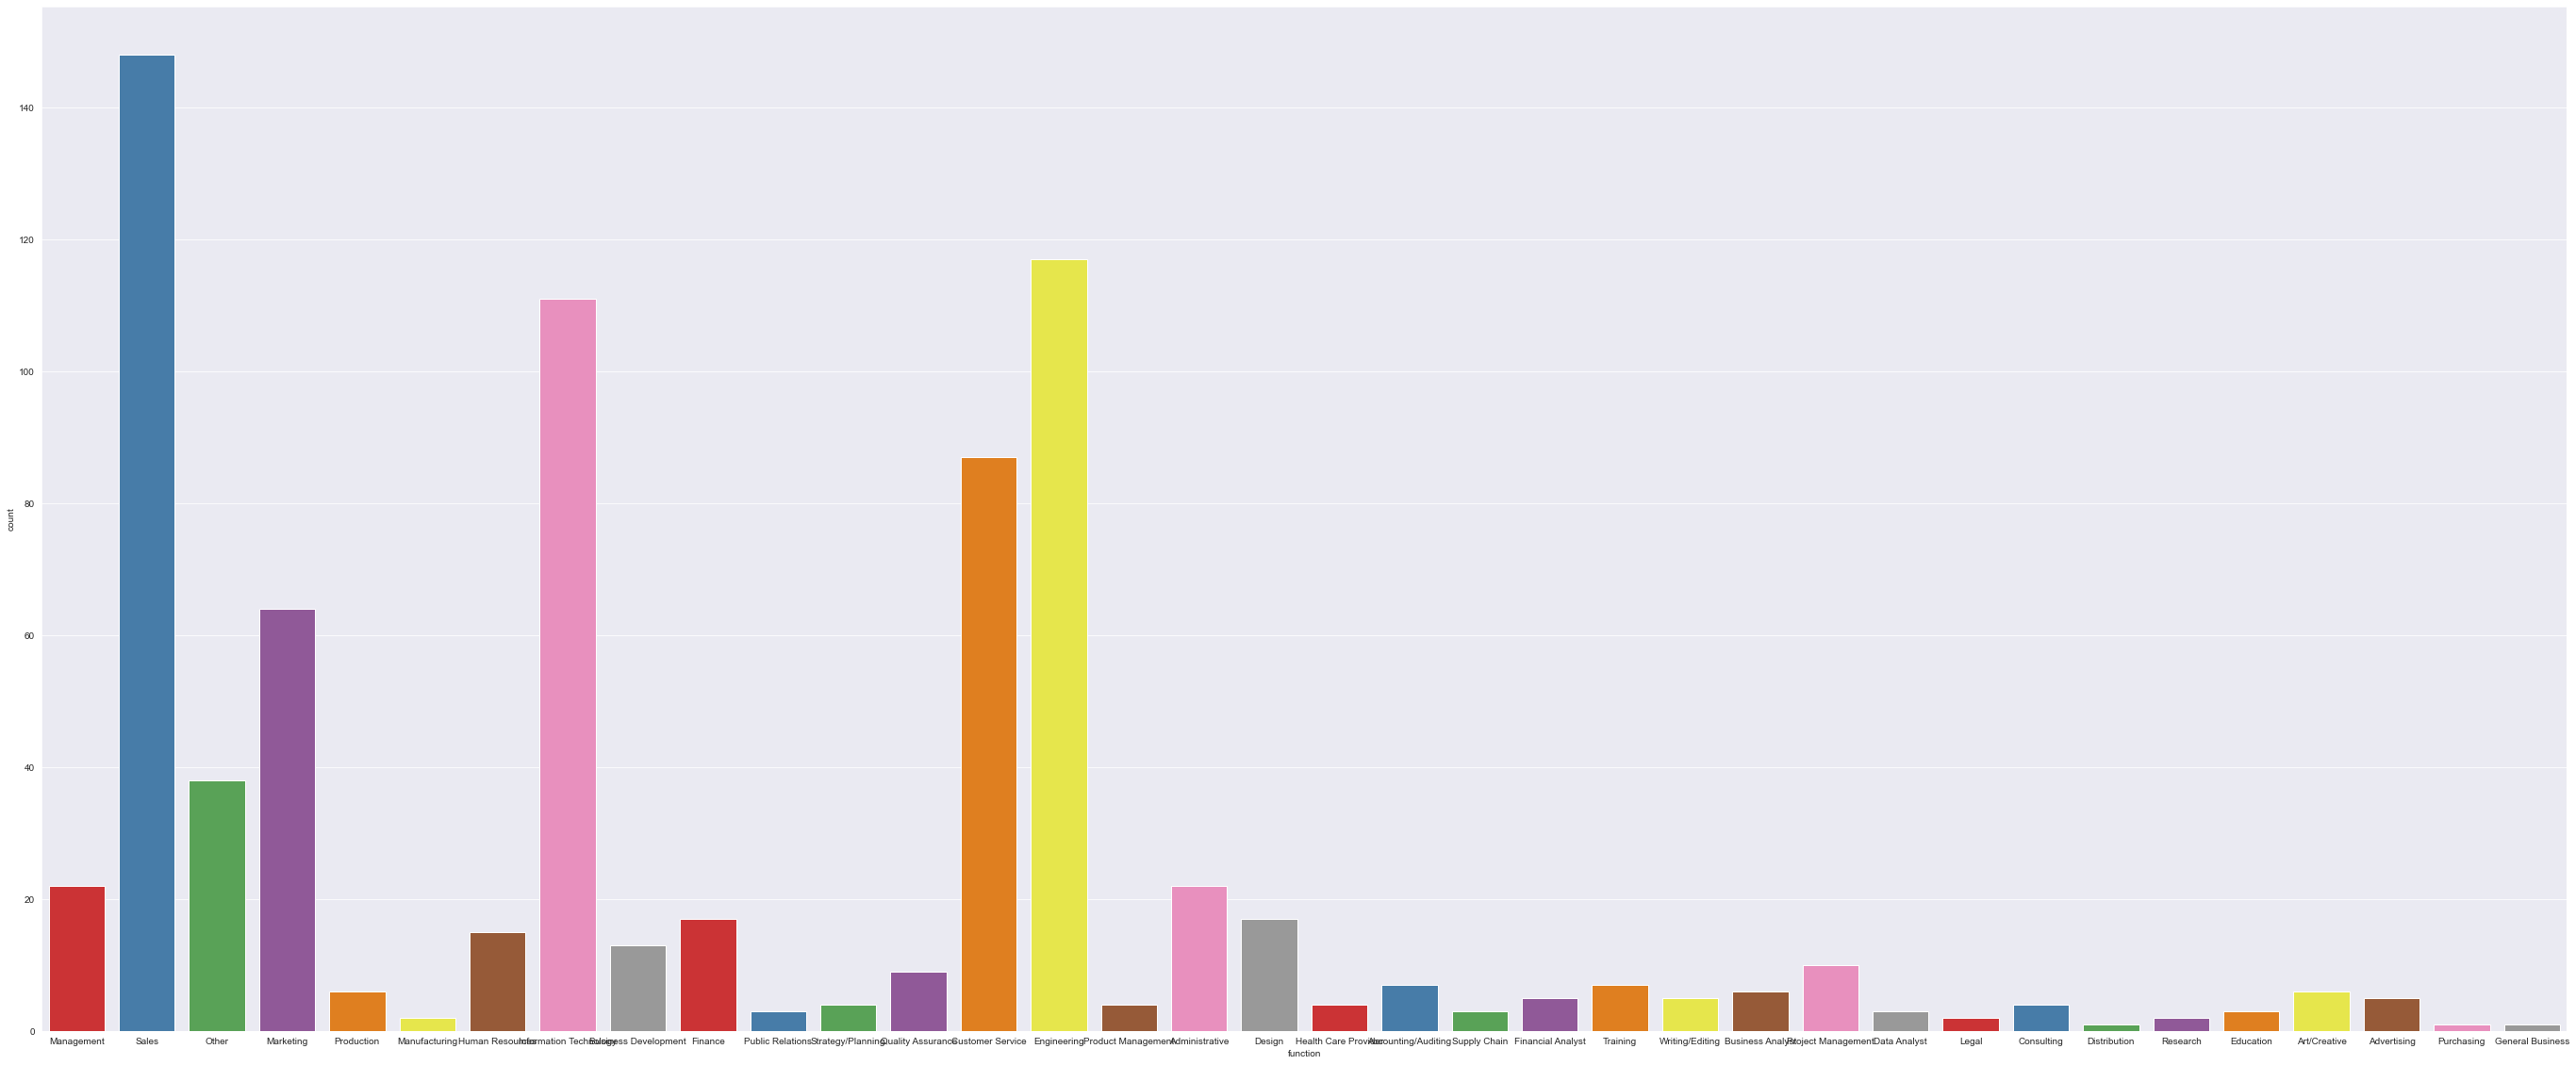

In [27]:
plt.figure(figsize=(48,20))
sb.set_style("darkgrid")
sb.countplot(x='function',data=df,palette='Set1')

In [28]:
df_jobs = df[(df['employment_type'] == 'Full-time') & (df['fraudulent']== 0)]


In [29]:
df_jobs.shape

(645, 18)

In [30]:
#Checking the counts of each unique value
df_jobs['title'].value_counts()

Systems Engineers/Network Administrators/Tiers I-III             8
Sales, Assistant Manager & Market Manager Positions Available    7
Customer Service Representative                                  7
Technical Support Associate                                      7
Marketing Manager                                                5
                                                                ..
Senior Python Backend Developer                                  1
Website Project Coordinator                                      1
Frontend Developer                                               1
Warehouse Operative at Wedo Home Colchester                      1
Server Developer                                                 1
Name: title, Length: 521, dtype: int64

In [31]:
df_jobs['title'].value_counts().max()

8

In [32]:
df.head(1)

,job_id,title,location,department,salary_range,company_profile,description,requirements,benefits,telecommuting,has_company_logo,has_questions,employment_type,required_experience,required_education,industry,function,fraudulent
6,7,Head of Content (m/f),"DE, BE, Berlin",ANDROIDPIT,20000-28000,"Founded in 2009, the Fonpit AG rose with its i...",Your Responsibilities: Manage the English-spea...,Your Know-How: ...,Your Benefits: Being part of a fast-growing co...,0,1,1,Full-time,Mid-Senior level,Master's Degree,Online Media,Management,0


In [33]:
#Only including rows which are fake job postings.
df_industry = df[df['fraudulent']== 1]

In [34]:
df_industry.shape

(72, 18)

In [35]:
#Checking each unique value counts of industry.
df_industry['industry'].value_counts()

Oil & Energy                            17
Real Estate                             10
Consumer Services                        8
Financial Services                       6
Computer & Network Security              5
Hospital & Health Care                   4
Management Consulting                    3
Retail                                   3
Insurance                                2
Human Resources                          2
Telecommunications                       2
Transportation/Trucking/Railroad         2
Construction                             1
Logistics and Supply Chain               1
Computer Networking                      1
Security and Investigations              1
Mechanical or Industrial Engineering     1
Warehousing                              1
Information Services                     1
Accounting                               1
Name: industry, dtype: int64

In [36]:
df['fraudulent'].value_counts()

0    702
1     72
Name: fraudulent, dtype: int64

In [37]:
from sklearn.preprocessing import LabelEncoder 

In [38]:
le = LabelEncoder()
df['title'] = le.fit_transform(df['title'])
df['location'] = le.fit_transform(df['location'])
df['company_profile'] = le.fit_transform(df['company_profile'])
df['requirements'] = le.fit_transform(df['requirements'])
df['employment_type'] = le.fit_transform(df['employment_type'])
df['required_experience'] = le.fit_transform(df['required_experience'])
df['required_education'] = le.fit_transform(df['required_education'])
df['industry'] = le.fit_transform(df['industry'])
df['function'] = le.fit_transform(df['function'])

In [36]:
df = df.reset_index()
df.head()

,index,job_id,title,location,department,salary_range,company_profile,description,requirements,benefits,telecommuting,has_company_logo,has_questions,employment_type,required_experience,required_education,industry,function,fraudulent
0,6,7,255,10,ANDROIDPIT,20000-28000,67,Your Responsibilities: Manage the English-spea...,613,Your Benefits: Being part of a fast-growing co...,0,1,1,1,5,4,50,20,0
1,15,16,596,91,Sales,120000-150000,89,About Vault Dragon Vault Dragon is Dropbox for...,316,"Basic: SGD 120,000Equity negotiable for a rock...",0,1,1,1,3,1,24,31,0
2,23,24,599,110,Businessfriend.com,100000-120000,165,#URL_eda2500ddcedb60957fcd7f5b164e092966f8c4e8...,304,Businessfriend will offer a competitive six fi...,0,1,0,1,3,7,38,31,0
3,98,99,269,100,Oil & Energy,95000-115000,196,"IC&amp;E Technician | Bakersfield, CA Mt. Poso...",414,BENEFITSWhat is offered:Competitive compensati...,0,1,1,1,5,3,49,23,1
4,102,103,346,43,Marketplace,15000-18000,125,The job is to support the growth of the #URL_9...,183,For a suitably motivated and success orientate...,1,1,0,1,2,1,38,22,0


In [37]:
from sklearn.model_selection import train_test_split


In [38]:
X = df[['index', 'title', 'location', 'company_profile', 'requirements',
       'telecommuting', 'has_company_logo', 'has_questions', 'employment_type',
       'required_experience', 'required_education', 'industry', 'function']].values
Y = df[['fraudulent']].values

In [39]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y)

In [40]:
X_train.shape, X_test.shape, Y_train.shape, Y_test.shape

((580, 13), (194, 13), (580, 1), (194, 1))

1. LOGISTIC REGRESSION

In [41]:
from sklearn.linear_model import LogisticRegression

In [42]:
LgR = LogisticRegression()

In [43]:
LgR.fit(X_train, Y_train)

/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [44]:
Y_pred = LgR.predict(X_test)

In [45]:
Y_test = Y_test.flatten()
Y_pred = Y_pred.flatten()

In [46]:
df_lgr = pd.DataFrame({'Y_test': Y_test , 'Y_pred': Y_pred}) 
df_lgr

,Y_test,Y_pred
0,0,0
1,0,0
2,0,0
3,0,0
4,0,0
...,...,...
189,0,0
190,0,0
191,0,0
192,0,0


In [47]:
from sklearn.metrics import accuracy_score, confusion_matrix
accuracy_score(Y_pred, Y_test)

0.9329896907216495

In [48]:
confusion_matrix(Y_test, Y_pred)

array([[181,   3],
       [ 10,   0]])

Accuracy using Logostic Regression Algorithm : 68%


2. k Nearest Neighbours

In [49]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(X_train,Y_train)

/opt/anaconda3/lib/python3.8/site-packages/sklearn/neighbors/_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


KNeighborsClassifier()

In [50]:
Y_pred = knn.predict(X_test)
Y_test = Y_test.flatten()
Y_pred = Y_pred.flatten()

In [51]:
df_knn = pd.DataFrame({'Y_test': Y_test , 'Y_pred': Y_pred}) 
df_knn

,Y_test,Y_pred
0,0,0
1,0,0
2,0,0
3,0,1
4,0,0
...,...,...
189,0,0
190,0,0
191,0,0
192,0,0


In [52]:
confusion_matrix(Y_test, Y_pred)

array([[177,   7],
       [  6,   4]])

In [53]:
accuracy_score(Y_pred,Y_test)

0.9329896907216495

Accuracy using K Nearest Neighbors Algorithm : 93.58% =~ 94%

3. Random Forest



In [54]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=5)
rfc.fit(X_train, Y_train)

<ipython-input-54-65bbe3b498d2>:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc.fit(X_train, Y_train)


RandomForestClassifier(n_estimators=5)

In [55]:
Y_pred = rfc.predict(X_test)
Y_test = Y_test.flatten()
Y_pred = Y_pred.flatten()

In [56]:
df_rfc = pd.DataFrame({'Y_test': Y_test , 'Y_pred': Y_pred}) 
df_rfc

,Y_test,Y_pred
0,0,0
1,0,0
2,0,0
3,0,0
4,0,0
...,...,...
189,0,0
190,0,0
191,0,0
192,0,0


In [57]:
confusion_matrix(Y_test, Y_pred)

array([[181,   3],
       [  1,   9]])

In [58]:
accuracy_score(Y_pred,Y_test)

0.979381443298969

Random Forest Accuracy 99%

4. SVM Classifier

In [59]:
from sklearn.svm import SVC
svc = SVC()
svc.fit(X_train,Y_train)

/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


SVC()

In [60]:
Y_pred = rfc.predict(X_test)
Y_test = Y_test.flatten()
Y_pred = Y_pred.flatten()

In [61]:
df_rfc = pd.DataFrame({'Y_test': Y_test , 'Y_pred': Y_pred}) 
df_rfc

,Y_test,Y_pred
0,0,0
1,0,0
2,0,0
3,0,0
4,0,0
...,...,...
189,0,0
190,0,0
191,0,0
192,0,0


In [62]:
confusion_matrix(Y_test, Y_pred)

array([[181,   3],
       [  1,   9]])

In [63]:
accuracy_score(Y_pred,Y_test)

0.979381443298969

SVC accurancy 98%

Decision Tree Classifier

In [64]:
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier()
dtc.fit(X_train, Y_train)

DecisionTreeClassifier()

In [65]:
Y_pred = dtc.predict(X_test)
Y_test = Y_test.flatten()
Y_pred = Y_pred.flatten()

In [66]:
df_dtc = pd.DataFrame({'Y_test': Y_test , 'Y_pred': Y_pred}) 
df_dtc

,Y_test,Y_pred
0,0,0
1,0,0
2,0,0
3,0,0
4,0,0
...,...,...
189,0,0
190,0,0
191,0,0
192,0,0


In [67]:
confusion_matrix(Y_test, Y_pred)

array([[181,   3],
       [  2,   8]])

In [68]:
accuracy_score(Y_pred,Y_test)

0.9742268041237113

Method 2 for plotting 

In [69]:
import pandas as pd # data processing
import numpy as np # working with arrays
import matplotlib.pyplot as plt # visualization
from matplotlib import rcParams # figure size
from termcolor import colored as cl # text customization

from sklearn.tree import DecisionTreeClassifier as dtc # tree algorithm
from sklearn.model_selection import train_test_split # splitting the data
from sklearn.metrics import accuracy_score # model precision
from sklearn.tree import plot_tree # tree diagram

ModuleNotFoundError: No module named 'termcolor'

In [70]:
model = dtc(criterion = 'entropy', max_depth = 4)
model.fit(X_train, Y_train)

pred_model = model.predict(X_test)

print(cl('Accuracy of the model is {:.0%}'.format(accuracy_score(Y_test, pred_model)), attrs = ['bold']))

TypeError: 'DecisionTreeClassifier' object is not callable

In [71]:
feature_names = df.columns[-14]
target_names = df['fraudulent'].unique().tolist()
target_names = [str(x) for x in target_names]

In [72]:
from sklearn import tree
from sklearn.externals.six import StringIO  
import pydot 

clf = tree.DecisionTreeClassifier()
clf = clf.fit(X_train, Y_train)

dot_data = StringIO() 
tree.export_graphviz(clf, out_file=dot_data) 
graph = pydot.graph_from_dot_data(dot_data.getvalue()) 

graph[0].write_pdf("fake.pdf")  # must access graph's first element

tree.plot_tree(clf) # the clf is your decision tree model

ModuleNotFoundError: No module named 'sklearn.externals.six'

SVM Heat Map

In [73]:
df

,index,job_id,title,location,department,salary_range,company_profile,description,requirements,benefits,telecommuting,has_company_logo,has_questions,employment_type,required_experience,required_education,industry,function,fraudulent
0,6,7,255,10,ANDROIDPIT,20000-28000,67,Your Responsibilities: Manage the English-spea...,613,Your Benefits: Being part of a fast-growing co...,0,1,1,1,5,4,50,20,0
1,15,16,596,91,Sales,120000-150000,89,About Vault Dragon Vault Dragon is Dropbox for...,316,"Basic: SGD 120,000Equity negotiable for a rock...",0,1,1,1,3,1,24,31,0
2,23,24,599,110,Businessfriend.com,100000-120000,165,#URL_eda2500ddcedb60957fcd7f5b164e092966f8c4e8...,304,Businessfriend will offer a competitive six fi...,0,1,0,1,3,7,38,31,0
3,98,99,269,100,Oil & Energy,95000-115000,196,"IC&amp;E Technician | Bakersfield, CA Mt. Poso...",414,BENEFITSWhat is offered:Competitive compensati...,0,1,1,1,5,3,49,23,1
4,102,103,346,43,Marketplace,15000-18000,125,The job is to support the growth of the #URL_9...,183,For a suitably motivated and success orientate...,1,1,0,1,2,1,38,22,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
769,17734,17735,138,197,Customer Service,30000-50000,71,We are Seeking a candidate whose core values i...,288,"Weekly pay, PTO, Paid Holidays, 401 k",1,1,0,1,2,3,55,7,1
770,17759,17760,138,167,Customer Service,30000-50000,71,We are Seeking a candidate whose core values i...,288,"Weekly pay, PTO, Paid Holidays, 401 k",1,1,0,1,2,3,55,7,1
771,17813,17814,138,178,Customer Service,30000-50000,71,We are Seeking a candidate whose core values i...,288,"Weekly pay, PTO, Paid Holidays, 401 k",1,1,0,1,2,3,55,7,1
772,17849,17850,100,120,Design,80000-100000,29,Balanced Labs exists to improve the lives of a...,479,"We offer great salaries, share options, and a ...",0,1,0,1,5,1,12,9,0


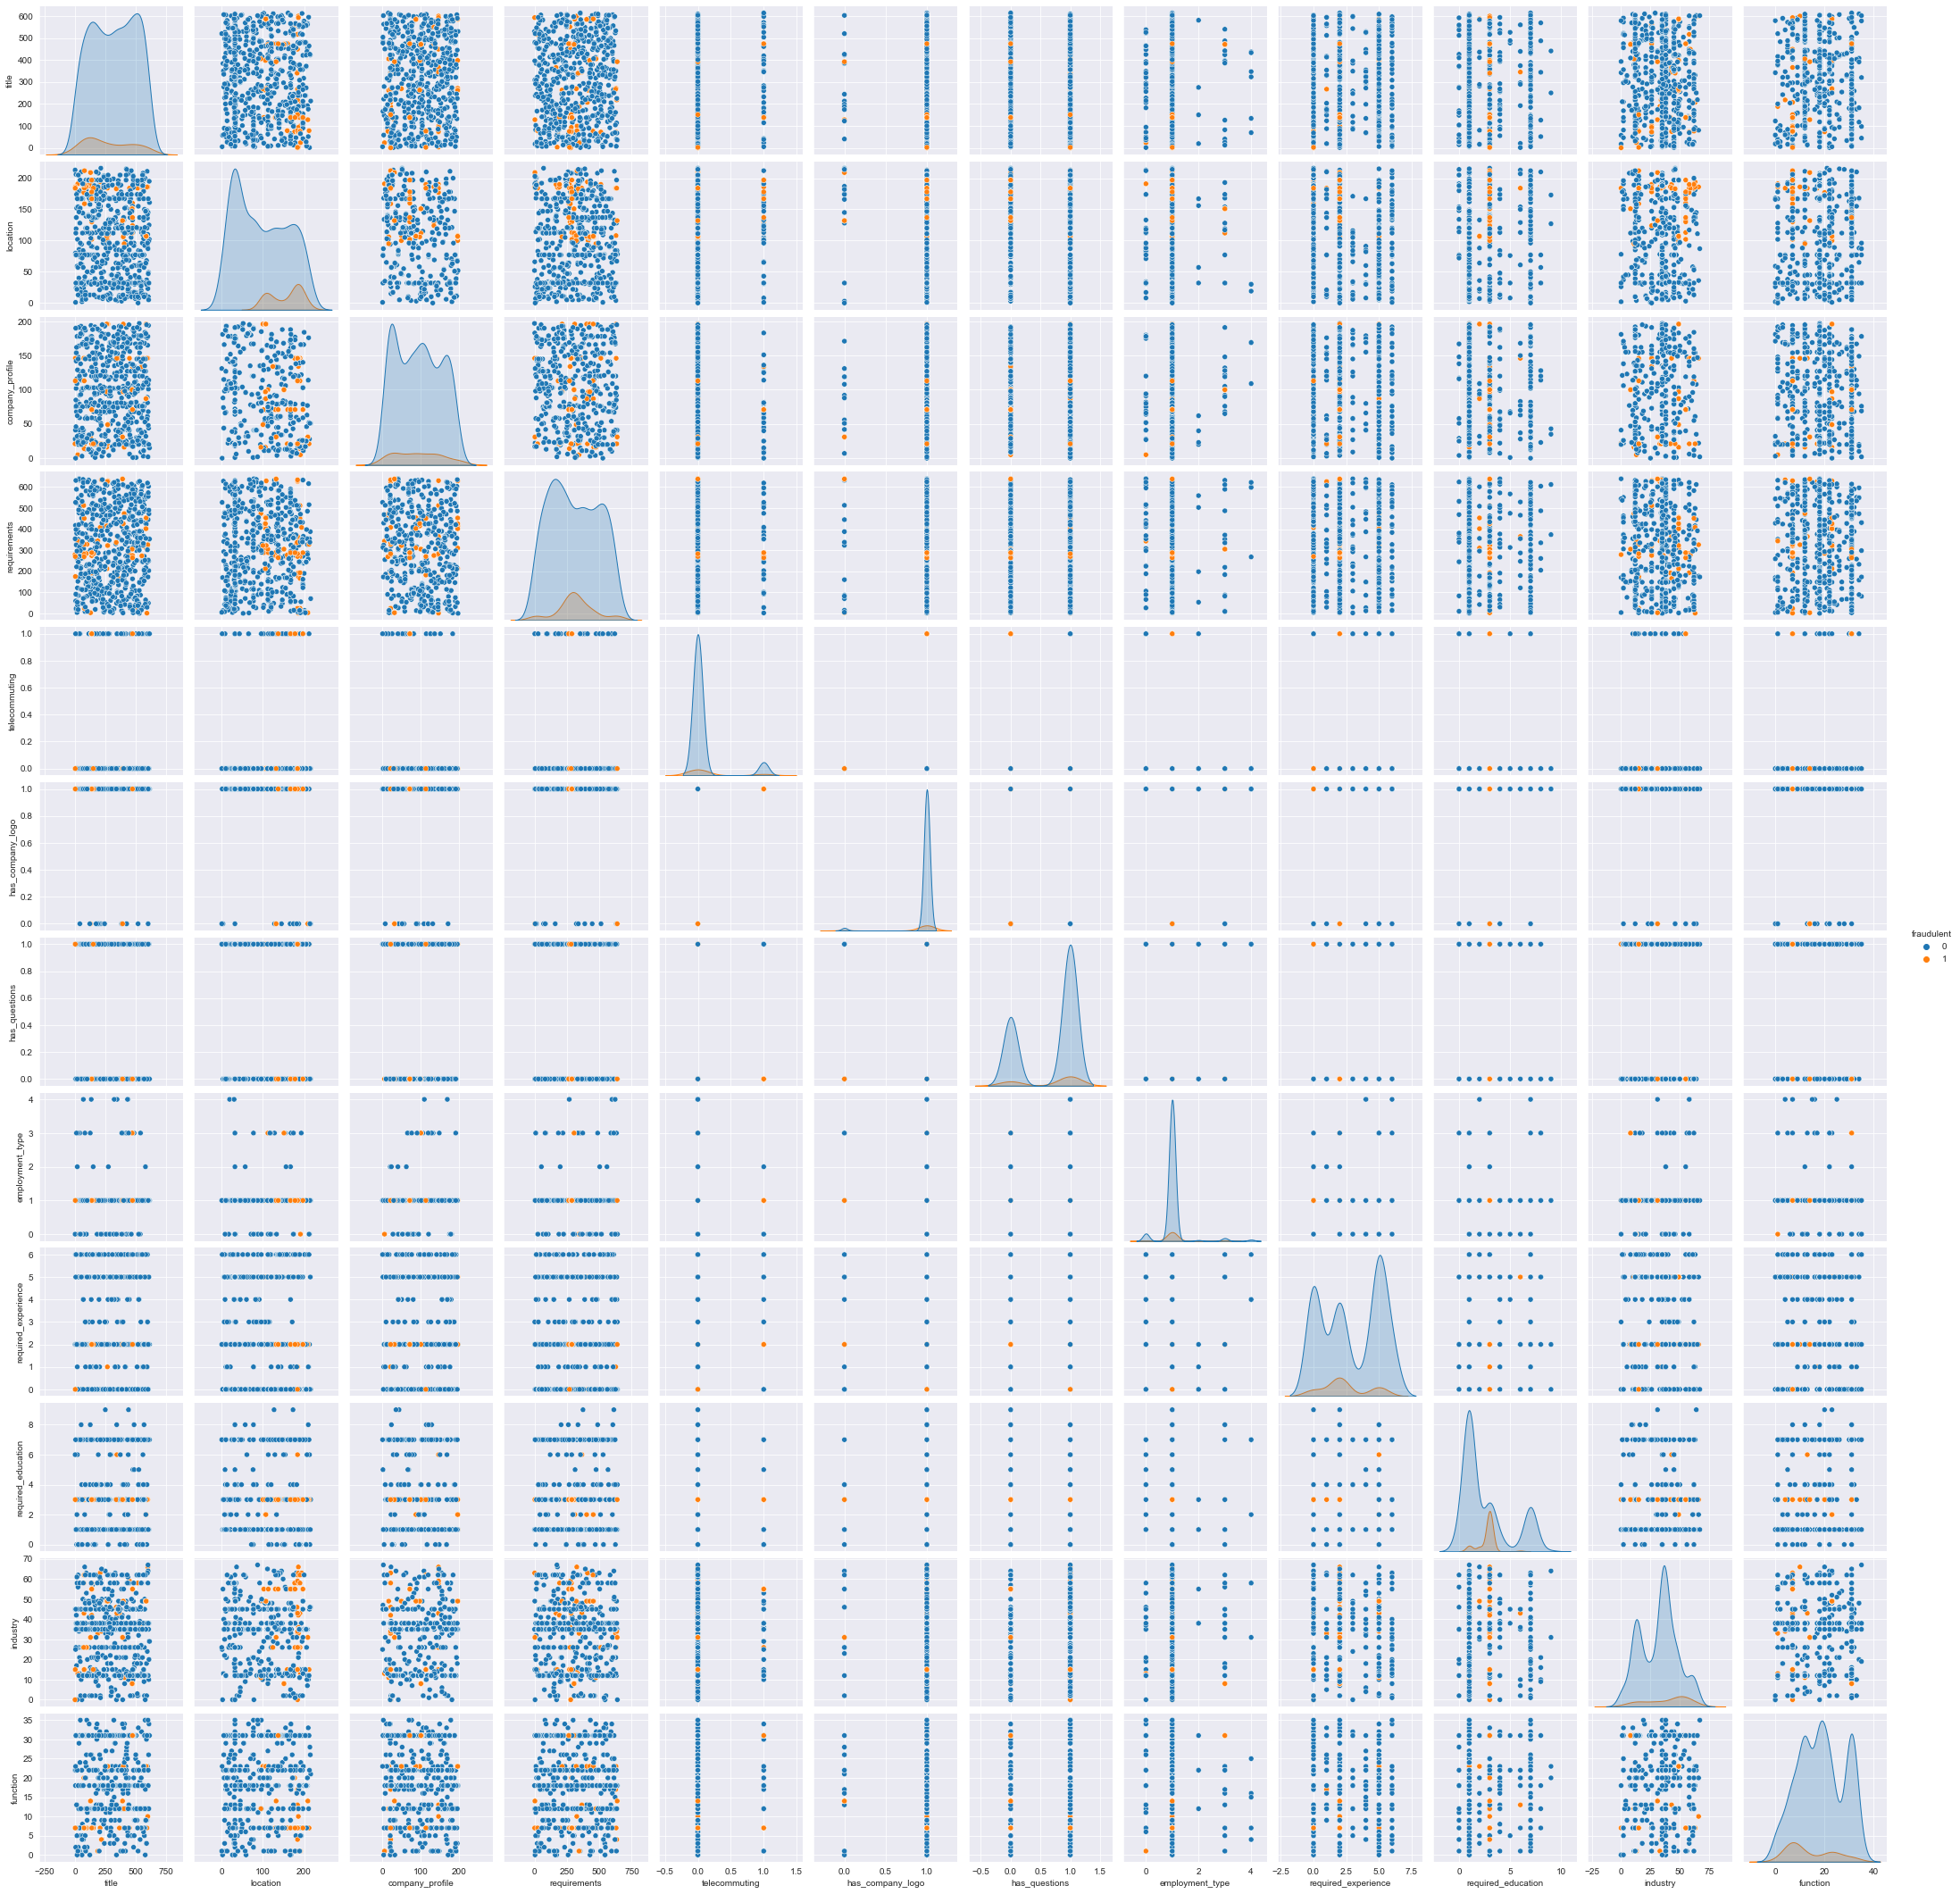

In [77]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


sns.pairplot(df, hue='fraudulent', vars=['title', 'location','company_profile', 'requirements', 'telecommuting', 'has_company_logo', 'has_questions', 'employment_type','required_experience', 'required_education', 'industry', 'function'])
plt.show()


/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


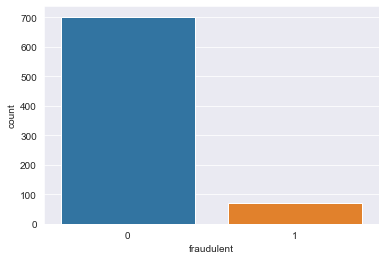

In [78]:
sns.countplot(df.fraudulent)
plt.show()

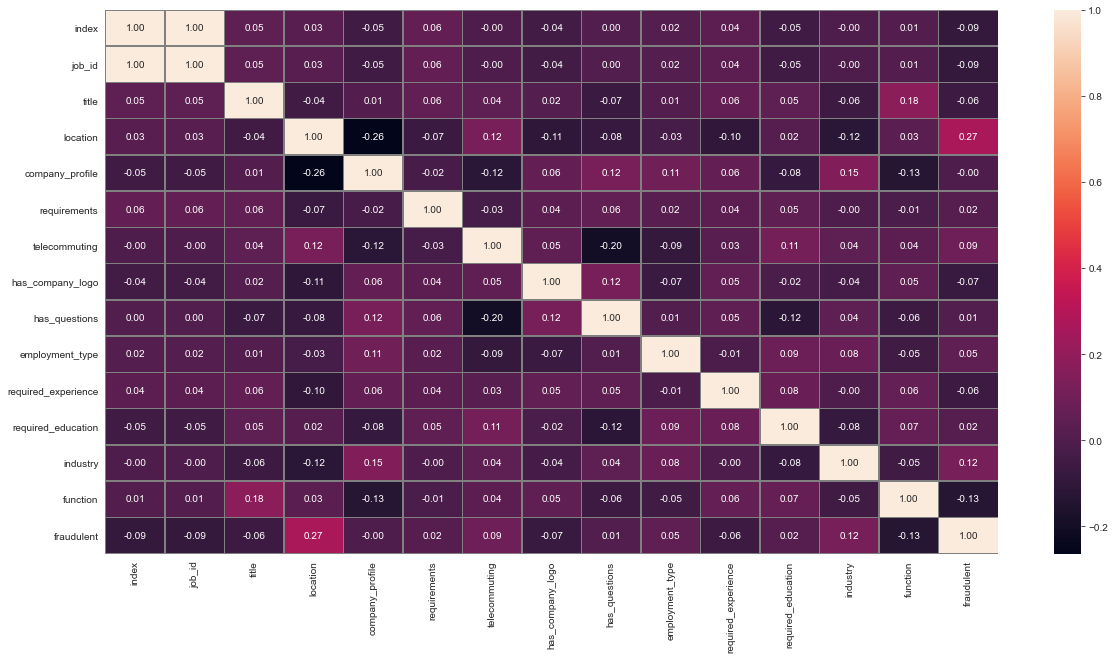

In [79]:
plt.figure(figsize=(20,10))
sns.heatmap(df.corr(), annot=True, linewidth=.5, fmt='.2f', linecolor = 'grey')
plt.show()